In [1]:
import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta
import datetime
import pandas as pd
import glob
import random
import re

In [2]:
ARTICLES_DIR = join('c:/Users/irish/tempdata', 'articles')
makedirs(ARTICLES_DIR, exist_ok=True)

In [3]:
API_ENDPOINT = 'http://content.guardianapis.com/search'
my_params = {
    'from-date': "",
    'to-date': "",
    'order-by': "newest",
    'show-fields': 'all',
    'page-size': 200,
    'api-key': '1f903d0c-4ddf-4546-ae0f-acdcef2f79c1'}

In [ ]:
start_date = date(2003, 1, 1)
end_date = date(2022,4, 1)
dayrange = range((end_date - start_date).days + 1)
for daycount in dayrange:
    dt = start_date + timedelta(days=daycount)
    datestr = dt.strftime('%Y-%m-%d')
    fname = join(ARTICLES_DIR, datestr + '.json')
    if not exists(fname):
        # then let's download it
        print("Downloading", datestr)
        all_results = []
        my_params['from-date'] = datestr
        my_params['to-date'] = datestr
        current_page = 1
        total_pages = 1
        while current_page <= total_pages:
            print("...page", current_page)
            my_params['page'] = current_page
            resp = requests.get(API_ENDPOINT, my_params)
            data = resp.json()
            all_results.extend(data['response']['results'])
            # if there is more than one page
            current_page += 1
            total_pages = data['response']['pages']

        with open(fname, 'w') as f:
            print("Writing to", fname)

            # re-serialize it for pretty indentation
            f.write(json.dumps(all_results, indent=2))

In [4]:
files = glob.glob(r'c:/Users/irish/tempdata/articles/20*.json')

In [5]:
words = ['cow','heifer', 'bull', 'hog', 'lamb', 'pork', 'farm', 'pigs', 'farmers', 'sheep', 'agriculture', 'beef']
sections = ['culture', 'education', 'world', 'technology', 'business', 'global', 'politics', 'money', 
            'environment', 'society','science']

In [6]:
articles = pd.DataFrame()
data = pd.DataFrame()

In [7]:
for file in files:
    data = pd.read_json(str(file), orient='columns')
    if len(data) > 0:
        data = data[data['webTitle'].str.contains("|".join(words),regex=True)]
        data = data[data['sectionId'].str.contains("|".join(sections),regex=True)]
        articles = articles.append(data, ignore_index=True)
        print('On date {}'.format(data['webPublicationDate'].head(1)))
        
articles['webPublicationDate'] = pd.to_datetime(articles['webPublicationDate'], format='%Y-%m-%d')

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationD

On date 126    2003-05-09T08:32:56Z
Name: webPublicationDate, dtype: object
On date 297    2003-05-10T01:10:26Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 211    2003-05-14T01:04:27Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 209    2003-05-16T01:17:54Z
Name: webPublicationDate, dtype: object
On date 66    2003-05-17T11:08:51Z
Name: webPublicationDate, dtype: object
On date 68    2003-05-18T22:55:31Z
Name: webPublicationDate, dtype: object
On date 204    2003-05-19T02:05:52Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 143    2003-05-21T08:09:19Z
Name: webPublicationDate, dtype: object
On date 81    2003-05-22T11:21:24Z
Name: webPublicationDate, dtype: object
On date Series([], 

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 133    2003-09-16T01:28:01Z
Name: webPublicationDate, dtype: object
On date 177    2003-09-17T01:21:50Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 130    2003-09-19T01:34:16Z
Name: webPublicationDate, dtype: object
On date 311    2003-09-20T01:42:36Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 18    2003-09-23T16:44:09Z
Name: webPublicationDate, dtype: object
On date 157    2003-09-24T01:58:11Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 96    2003-09-26T08:38:42Z
Name: webPublicationDate, dtype: object
On date 269    2003-09-27T01:34:56Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublic

On date Series([], Name: webPublicationDate, dtype: object)
On date 74    2004-01-21T13:31:20Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 34    2004-01-23T15:25:49Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 130    2004-01-25T01:19:41Z
Name: webPublicationDate, dtype: object
On date 136    2004-01-26T08:55:45Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 103    2004-01-29T11:44:11Z
Name: webPublicationDate, dtype: object
On date 242    2004-01-30T02:50:39Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On dat

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 169    2004-06-01T00:52:27Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 143    2004-06-04T01:31:42Z
Name: webPublicationDate, dtype: object
On date 165    2004-06-05T01:04:50Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 33    2004-06-09T15:39:43Z
Name: webPublicationDate, dtype: object
On date 70    2004-06-10T11:08:04Z
Name: webPublicationDate, dtype: object
On date Series([], Nam

On date 35    2004-10-06T23:07:20Z
Name: webPublicationDate, dtype: object
On date 9    2004-10-07T23:03:57Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 253    2004-10-12T02:10:44Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 63    2004-10-14T23:00:54Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 249    2004-10-16T00:12:36Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 18    2004-10-18T22:53:10Z
Name: webPublicationDate, dtype: object
On date 76    2004-10-19T22:55:06Z
Name: webPublicationDate, dtype: object
On date 117    2004-10-20T12:25:24Z
Name: webPublicati

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 140    2005-02-14T02:39:14Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 252    2005-02-18T00:00:23Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 176    2005-02-21T01:44:16Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 175    2005-02-24T02:20:51Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 48    2005-02-26T14:03:58Z
Name: webPublicationDate, dtype: object
On date Series([], Na

On date 121    2005-06-20T11:39:11Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 121    2005-06-23T12:16:50Z
Name: webPublicationDate, dtype: object
On date 216    2005-06-24T14:23:41Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 164    2005-06-26T00:00:11Z
Name: webPublicationDate, dtype: object
On date 234    2005-06-27T00:06:20Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 180    2005-06-29T06:07:49Z
Name: webPublicationDate, dtype: object
On date 130    2005-06-30T22:56:54Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 4    2005-07-04T23:36:00Z
Name: webPubli

On date 32    2005-10-25T23:01:24Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 91    2005-10-27T14:48:42Z
Name: webPublicationDate, dtype: object
On date 7    2005-10-28T23:59:14Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 242    2005-11-01T00:02:47Z
Name: webPublicationDate, dtype: object
On date 257    2005-11-02T00:04:45Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 170    2005-11-04T01:33:52Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 9    2005-11-08T23:55:14Z
Name: webPublicationDate, dtype: o

On date 209    2006-02-28T01:26:24Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 30    2006-03-02T15:41:14Z
Name: webPublicationDate, dtype: object
On date 137    2006-03-03T11:30:09Z
Name: webPublicationDate, dtype: object
On date 192    2006-03-04T00:10:46Z
Name: webPublicationDate, dtype: object
On date 38    2006-03-05T23:56:04Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 40    2006-03-08T16:07:10Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 257    2006-03-11T00:07:36Z
Name: webPublicationDate, dtype: object
On date 142    2006-03-12T00:47:19Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublica

On date Series([], Name: webPublicationDate, dtype: object)
On date 227    2006-07-07T11:14:33Z
Name: webPublicationDate, dtype: object
On date 195    2006-07-08T22:55:07Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 0    2006-07-12T23:47:20Z
Name: webPublicationDate, dtype: object
On date 97    2006-07-13T23:03:51Z
Name: webPublicationDate, dtype: object
On date 178    2006-07-14T18:25:49Z
Name: webPublicationDate, dtype: object
On date 275    2006-07-15T01:12:44Z
Name: webPublicationDate, dtype: object
On date 5    2006-07-16T23:13:47Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 204    2006-07-18T11:41:43Z
Name: webPublicationDate, dtype: object
On date 184    2006-07-19T12:01:32Z
Name: webPublicationDate, dtype: object
On date 7    2006-07-

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 179    2006-11-10T09:09:28Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 216    2006-11-13T08:42:40Z
Name: webPublicationDate, dtype: object
On date 248    2006-11-14T01:46:07Z
Name: webPublicationDate, dtype: object
On date 294    2006-11-15T00:18:06Z
Name: webPublicationDate, dtype: object
On date 8    2006-11-16T23:57:54Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 189    2006-11-20T11:01:53Z
Name: webPublicationDate, dtype: object
On date 305    2006-11-21T00:11:10Z
Name: webPublicationDate, dtyp

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 143    2007-03-14T12:35:19Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 224    2007-03-17T00:07:42Z
Name: webPublicationDate, dtype: object
On date 273    2007-03-18T01:10:02Z
Name: webPublicationDate, dtype: object
On date 71    2007-03-19T15:34:21Z
Name: webPublicationDate, dtype: object
On date 109    2007-03-20T15:00:08Z
Name: webPublicationDate, dtype: object
On date 197    2007-03-21T11:27:02Z
Name: webPublicationDate, dtype: object
On date 67    2007-03-22T17:29:49Z
Name: webPublicationDate, dtype: object
On date 32    2007-03-23T23:56:32Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 52    2007-03-25T22:59:08Z


On date 70    2007-07-12T22:59:23Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 41    2007-07-16T23:09:05Z
Name: webPublicationDate, dtype: object
On date 162    2007-07-17T16:47:54Z
Name: webPublicationDate, dtype: object
On date 14    2007-07-18T23:16:35Z
Name: webPublicationDate, dtype: object
On date 204    2007-07-19T13:26:39Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 135    2007-07-22T08:13:29Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 120    2007-07-26T23:00:41Z
Name: webPublicationDate, dtype

On date Series([], Name: webPublicationDate, dtype: object)
On date 256    2007-11-17T01:17:42Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 197    2007-11-19T13:12:38Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 261    2007-11-21T10:08:19Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 357    2007-11-24T00:07:16Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 30    2007-11-26T23:49:15Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 87    2007-11-29T17:24:02Z
Name: webPublicationDate, dtype: object
On date 258    2007-11-30T12:07:30Z
Name: webPublicationDate, dtyp

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 81    2008-03-23T09:28:13Z
Name: webPublicationDate, dtype: object
On date 9    2008-03-24T18:37:22Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 237    2008-03-26T09:53:10Z
Name: webPublicationDate, dtype: object
On date 269    2008-03-27T02:11:34Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 174    2008-03-29T00:17:24Z
Name: webPublicationDate, dtype: object
On date 78    2008-03-30T23:04:03Z
Name: webPublicationDate, dtype: object
On date 39    2008-03-31T23:10:32Z
Name: webPublicationDate, dtype: 

On date Series([], Name: webPublicationDate, dtype: object)
On date 263    2008-07-16T11:44:43Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 79    2008-07-18T23:01:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 89    2008-07-20T23:01:00Z
Name: webPublicationDate, dtype: object
On date 90    2008-07-21T23:01:00Z
Name: webPublicationDate, dtype: object
On date 50    2008-07-22T23:01:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 109    2008-07-24T23:01:00Z
Name: webPublicationDate, dtype: object
On date 36    2008-07-25T23:01:00Z
Name: webPublicationDate, dtype: object
On date 157    2008-07-26T23:01:00Z
Name: webPublicationDate, dtype: object
On date 29    2008-07-27T23:01:00Z
Name: webPublicationDate, dtype: object
On date 55    2008-07-28T23:01:00Z
Name: webPublicationDate, dtype: object
On date

On date 189    2008-11-17T11:25:32Z
Name: webPublicationDate, dtype: object
On date 332    2008-11-18T00:01:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 129    2008-11-20T13:45:01Z
Name: webPublicationDate, dtype: object
On date 180    2008-11-21T12:18:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 338    2008-11-24T00:01:00Z
Name: webPublicationDate, dtype: object
On date 64    2008-11-25T16:01:04Z
Name: webPublicationDate, dtype: object
On date 210    2008-11-26T10:30:25Z
Name: webPublicationDate, dtype: object
On date 310    2008-11-27T00:01:00Z
Name: webPublicationDate, dtype: object
On date 162    2008-11-28T12:03:50Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([]

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 389    2009-03-20T00:01:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 188    2009-03-22T00:01:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 322    2009-03-24T00:01:00Z
Name: webPublicationDate, dtype: object
On date 168    2009-03-25T12:38:34Z
Name: webPublicationDate, dtype: object
On date 322    2009-03-26T00:01:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 276    2009-03-28T00:01:00Z
Name: webPublicationDate, dtype: object
On date 232    2009-03-29T00:01:00Z
Name: webPublicationDate, dtype: object
On date 67    2009-03-30T23:01:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPubli

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 22    2009-07-21T23:05:12Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 243    2009-07-24T15:45:33Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 11    2009-07-26T23:05:19Z
Name: webPublicationDate, dtype: object
On date 78    2009-07-27T18:32:41Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 76    2009-07-29T19:38:31Z
Name: webPublicationDate, dtype: object
On date 294    2009-07-30T06:32:14Z
Name: webPublicationDate, dtype: object
On date 37    2009-07-31T23:02:05Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: o

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 207    2009-11-25T09:57:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 165    2009-11-28T00:00:00Z
Name: webPublicationDate, dtype: object
On date 90    2009-11-29T00:49:39Z
Name: webPublicationDate, dtype: object
On date 118    2009-11-30T14:56:04Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 271    2009-12-02T00:05:09Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 61    2009-12-04T18:18:48Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On dat

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 59    2010-03-29T19:58:12Z
Name: webPublicationDate, dtype: object
On date 47    2010-03-30T21:28:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 149    2010-04-01T16:04:00Z
Name: webPublicationDate, dtype: object
On date 153    2010-04-02T18:54:20Z
Name: webPublicationDate, dtype: object
On date 0    2010-04-03T23:54:46Z
Name: webPublicationDate, dtype: object
On date 2    2010-04-04T23:35:12Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 207    2010-04-08T14:11:12Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: ob

On date Series([], Name: webPublicationDate, dtype: object)
On date 64    2010-08-02T19:32:01Z
Name: webPublicationDate, dtype: object
On date 64    2010-08-03T19:50:49Z
Name: webPublicationDate, dtype: object
On date 112    2010-08-04T17:06:25Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 246    2010-08-06T14:36:11Z
Name: webPublicationDate, dtype: object
On date 119    2010-08-07T23:04:20Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 63    2010-08-09T19:43:07Z
Name: webPublicationDate, dtype: object
On date 193    2010-08-10T13:00:40Z
Name: webPublicationDate, dtype: object
On date 136    2010-08-11T15:19:57Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 228    2010-08-13T17:23:01Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], 

On date 64    2010-12-06T21:30:03Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 42    2010-12-08T21:30:19Z
Name: webPublicationDate, dtype: object
On date 227    2010-12-09T15:52:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 216    2010-12-13T13:20:26Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 45    2010-12-15T20:50:18Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 84    2010-12-17T18:45:38Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 99    2010-12-19T14:47:54Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: o

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 187    2011-04-21T14:51:14Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 286    2011-04-29T12:14:40Z
Name: webPublicationDate, dtype: object
On date 152    2011-04-30T20:32:42Z
Name: webPublicationDate, dtype:

On date 84    2011-08-21T18:00:01Z
Name: webPublicationDate, dtype: object
On date 114    2011-08-22T17:06:50Z
Name: webPublicationDate, dtype: object
On date 12    2011-08-23T23:01:00Z
Name: webPublicationDate, dtype: object
On date 97    2011-08-24T18:26:01Z
Name: webPublicationDate, dtype: object
On date 163    2011-08-25T16:45:28Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 207    2011-08-30T11:57:00Z
Name: webPublicationDate, dtype: object
On date 123    2011-08-31T16:48:33Z
Name: webPublicationDate, dtype: object
On date 133    2011-09-01T19:13:22Z
Name: webPublicationDate, dtype: object
On date 225    2011-09-02T16:46:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], 

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 65    2011-12-29T18:50:22Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 112    2012-01-03T16:44:03Z
Name: webPublicationDate, dtype: object
On date 119    2012-01-04T16:25:21Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: o

On date 211    2012-04-28T13:29:42Z
Name: webPublicationDate, dtype: object
On date 104    2012-04-29T17:00:00Z
Name: webPublicationDate, dtype: object
On date 125    2012-04-30T16:30:01Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 160    2012-05-03T16:03:13Z
Name: webPublicationDate, dtype: object
On date 174    2012-05-04T20:00:03Z
Name: webPublicationDate, dtype: object
On date 175    2012-05-05T17:03:24Z
Name: webPublicationDate, dtype: object
On date 0    2012-05-06T23:58:21Z
Name: webPublicationDate, dtype: object
On date 116    2012-05-07T16:06:05Z
Name: webPublicationDate, dtype: object
On date 89    2012-05-08T18:42:53Z
Name: webPublicationDate, dtype: object
On date 198    2012-05-09T13:39:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 101    2012-05-11T22:41:39Z
Name: webPublicationDate, d

On date 78    2012-08-25T23:05:00Z
Name: webPublicationDate, dtype: object
On date 94    2012-08-26T15:25:46Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 98    2012-08-30T18:37:00Z
Name: webPublicationDate, dtype: object
On date 216    2012-08-31T16:13:56Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 244    2012-09-04T11:43:00Z
Name: webPublicationDate, dtype: object
On date 249    2012-09-05T10:51:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 437    2012-09-07T07:29:38Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype:

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 90    2012-12-30T09:00:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 44    2013-01-01T17:17:11Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 352    2013-01-04T07:00:00Z
Name: webPublicationDate, dtype: object
On date 110    2013-01-05T09:00:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 138    2013-01-07T15:53:18Z
Name: webPublicationDate, dtype: object
On date 210    2013-01-08T13:57:01Z
Name: webPublicationDate, dtype: object
On date 380    2013-01-09T00:39:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype

On date Series([], Name: webPublicationDate, dtype: object)
On date 69    2013-05-03T18:05:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 334    2013-05-10T11:08:48Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 81    2013-05-13T18:05:00Z
Name: webPublicationDate, dtype: object
On date 203    2013-05-14T13:15:20Z
Name: webPublicationDate, dtype: object
On date 162    2013-05-15T14:52:00Z
Name: webPublicationDate, dtype: object
On date 85    2013-05-16T21:00:00Z
Name: webPublicationDate, dtype: object
On date

On date 122    2013-08-30T16:24:56Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 319    2013-09-02T06:00:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 432    2013-09-06T00:52:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 2    2013-09-08T23:21:00Z
Name: webPublicationDate, dtype: object
On date 88    2013-09-09T18:00:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 49    2013-09-11T20:00:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 8    2013-09-13T22:56:37Z
Name: webPublicationDate, dtype: o

On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 87    2014-01-07T17:16:22Z
Name: webPublicationDate, dtype: object
On date 124    2014-01-08T16:27:58Z
Name: webPublicationDate, dtype: object
On date 77    2014-01-09T19:02:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 77    2014-01-12T18:00:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublication

On date 229    2014-04-30T12:59:00Z
Name: webPublicationDate, dtype: object
On date 75    2014-05-01T19:59:02Z
Name: webPublicationDate, dtype: object
On date 444    2014-05-02T04:24:25Z
Name: webPublicationDate, dtype: object
On date 79    2014-05-03T21:22:45Z
Name: webPublicationDate, dtype: object
On date 42    2014-05-04T19:33:27Z
Name: webPublicationDate, dtype: object
On date 270    2014-05-05T01:00:47Z
Name: webPublicationDate, dtype: object
On date 205    2014-05-06T13:02:00Z
Name: webPublicationDate, dtype: object
On date 383    2014-05-07T03:18:31Z
Name: webPublicationDate, dtype: object
On date 232    2014-05-08T13:00:00Z
Name: webPublicationDate, dtype: object
On date 34    2014-05-09T20:01:16Z
Name: webPublicationDate, dtype: object
On date 171    2014-05-10T12:18:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 413    2014-05-12T02:01:53Z
Name: webPublicationDate, dtype: object
On date 24    2014-05-13T22:03:4

On date 196    2014-08-29T13:20:03Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 42    2014-08-31T19:59:47Z
Name: webPublicationDate, dtype: object
On date 127    2014-09-01T14:58:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 289    2014-09-05T11:08:39Z
Name: webPublicationDate, dtype: object
On date 101    2014-09-06T20:20:39Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 67    2014-09-08T18:35:37Z
Name: webPublicationDate, dtype: object
On date 201    2014-09-09T13:30:13Z
Name: webPublicationDate, dtype: object
On date 9    2014-09-10T23:01:24Z
Name: webPublicationDate, dtype: object
On date 19    2014-09-11T21:59:11Z
Name: webPublicationDate, dtype: object
On date 337    2014-0

On date 123    2015-01-01T09:00:06Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 147    2015-01-04T06:00:13Z
Name: webPublicationDate, dtype: object
On date 131    2015-01-05T13:59:32Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 55    2015-01-07T18:43:20Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 212    2015-01-13T12:00:06Z
Name: webPublicationDate, dtype: object
On date 94    2015-01-14T16:50:07Z
Name: webPublicationDate, dtype: object
On date 252    2015-01-15T12:30:02Z
Name: webPublicationDate, dtyp

On date 154    2015-04-29T15:04:01Z
Name: webPublicationDate, dtype: object
On date 244    2015-04-30T11:37:49Z
Name: webPublicationDate, dtype: object
On date 401    2015-05-01T06:23:11Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 36    2015-05-05T19:32:58Z
Name: webPublicationDate, dtype: object
On date 120    2015-05-06T15:20:47Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 241    2015-05-12T11:18:44Z
Name: webPublicationDate, dtype: object
On date 115    2015-05-13T16:06:46Z
Name: webPublicationDate, dty

On date 158    2015-08-26T14:04:32Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 319    2015-08-28T06:00:05Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 81    2015-09-01T17:00:10Z
Name: webPublicationDate, dtype: object
On date 155    2015-09-02T14:11:38Z
Name: webPublicationDate, dtype: object
On date 148    2015-09-03T16:00:14Z
Name: webPublicationDate, dtype: object
On date 291    2015-09-04T06:00:10Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 393    2015-09-09T01:38:13Z
Name: webPublicationDate, dty

On date 31    2015-12-21T19:09:58Z
Name: webPublicationDate, dtype: object
On date 221    2015-12-22T05:00:04Z
Name: webPublicationDate, dtype: object
On date 215    2015-12-23T07:00:44Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 98    2015-12-26T09:00:21Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 125    2015-12-30T12:30:04Z
Name: webPublicationDate, dtype: object
On date 219    2015-12-31T00:25:03Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On dat

On date 36    2016-04-20T20:41:10Z
Name: webPublicationDate, dtype: object
On date 243    2016-04-21T11:25:52Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 31    2016-04-23T21:38:24Z
Name: webPublicationDate, dtype: object
On date 140    2016-04-24T08:00:12Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 336    2016-04-26T04:30:08Z
Name: webPublicationDate, dtype: object
On date 3    2016-04-27T23:27:15Z
Name: webPublicationDate, dtype: object
On date 53    2016-04-28T20:00:26Z
Name: webPublicationDate, dtype: object
On date 107    2016-04-29T15:44:39Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 34    2016-05-02T20:44:40Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 22    2016-05-

On date 91    2016-08-17T17:16:47Z
Name: webPublicationDate, dtype: object
On date 55    2016-08-18T19:57:50Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 119    2016-08-21T11:09:46Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 50    2016-08-23T18:32:29Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 93    2016-08-25T16:16:21Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 124    2016-08-28T08:46:26Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 249    2016-08-30T06:45:15Z
Name: webPublicationDate, dtype: object
On date 112    2016-08-31T16:22:35Z
Name: webPublica

On date 28    2016-12-16T18:56:07Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 231    2016-12-19T07:00:13Z
Name: webPublicationDate, dtype: object
On date 74    2016-12-20T16:18:35Z
Name: webPublicationDate, dtype: object
On date 157    2016-12-21T10:46:05Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 1    2016-12-24T22:05:35Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 6    2016-12-27T22:18:07Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 109    2016-12-29T10:49:50Z
Name: webPublicationDate, dtype: object
On date 38    2016-12-30T18:13:28Z
Name: webPublicatio

On date 21    2017-04-17T20:00:09Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 53    2017-04-19T18:36:08Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 97    2017-04-22T13:00:14Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 250    2017-04-24T04:01:01Z
Name: webPublicationDate, dtype: object
On date 94    2017-04-25T15:46:37Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 29    2017-04-27T20:02:27Z
Name: webPublicationDate, dtype: object
On date 44    2017-04-28T17:39:15Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 45    2017-04-30T18:02:42Z
Name: webPublicationDate, dtype: object
On date 30    2017-05-01T20:38:17Z
Name

On date 147    2017-08-19T08:00:08Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 66    2017-08-21T16:04:19Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 230    2017-08-24T02:58:48Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 131    2017-08-26T06:00:28Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 25    2017-08-28T19:40:33Z
Name: webPublicationDate, dtype: object
On date 160    2017-08-29T09:27:10Z
Name: webPublicationDate, dtype: object
On date 156    2017-08-30T10:17:26Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 125    2017-09-01T13:37:47Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublic

On date 154    2017-12-18T06:03:11Z
Name: webPublicationDate, dtype: object
On date 61    2017-12-19T17:00:10Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 5    2017-12-21T22:30:36Z
Name: webPublicationDate, dtype: object
On date 31    2017-12-22T17:51:54Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 141    2017-12-29T10:30:27Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 127    2018-01-0

On date 129    2018-04-18T12:25:32Z
Name: webPublicationDate, dtype: object
On date 123    2018-04-19T13:00:07Z
Name: webPublicationDate, dtype: object
On date 211    2018-04-20T08:08:27Z
Name: webPublicationDate, dtype: object
On date 11    2018-04-21T22:15:25Z
Name: webPublicationDate, dtype: object
On date 106    2018-04-22T10:30:20Z
Name: webPublicationDate, dtype: object
On date 115    2018-04-23T12:15:44Z
Name: webPublicationDate, dtype: object
On date 127    2018-04-24T14:43:22Z
Name: webPublicationDate, dtype: object
On date 250    2018-04-25T00:05:47Z
Name: webPublicationDate, dtype: object
On date 120    2018-04-26T12:46:12Z
Name: webPublicationDate, dtype: object
On date 11    2018-04-27T22:00:00Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 225    2018-04-30T04:48:30Z
Name: webPublicationDate, dtype: object
On date 14    2018-05-01T21:30:05Z
Name: webPu

On date 94    2018-08-19T12:04:31Z
Name: webPublicationDate, dtype: object
On date 95    2018-08-20T13:27:41Z
Name: webPublicationDate, dtype: object
On date 7    2018-08-21T23:01:41Z
Name: webPublicationDate, dtype: object
On date 13    2018-08-22T21:45:24Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 81    2018-08-24T13:49:56Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 133    2018-08-26T06:00:09Z
Name: webPublicationDate, dtype: object
On date 11    2018-08-27T21:21:01Z
Name: webPublicationDate, dtype: object
On date 1    2018-08-28T23:18:14Z
Name: webPublicationDate, dtype: object
On date 29    2018-08-29T19:00:36Z
Name: webPublicationDate, dtype: object
On date 132    2018-08-30T11:41:52Z
Name: webPublicationDate, dtype: object
On date 34    2018-08-31T20:10:45Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: obj

On date 190    2018-12-18T05:14:02Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 111    2018-12-20T12:17:38Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 105    2018-12-27T05:30:13Z
Name: webPublicationDate, dtype: object
On date 94    2018-12-28T11:00:21Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicati

On date Series([], Name: webPublicationDate, dtype: object)
On date 92    2019-04-21T09:59:51Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 194    2019-04-24T05:00:25Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 86    2019-04-26T14:06:13Z
Name: webPublicationDate, dtype: object
On date 113    2019-04-27T08:00:06Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 82    2019-04-29T16:18:21Z
Name: webPublicationDate, dtype: object
On date 12    2019-04-30T22:42:19Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date Series([], Name: webPublicationDate, dtype: object)
On date 

On date 4    2019-08-21T23:01:23Z
Name: webPublicationDate, dtype: object
On date 167    2019-08-22T06:00:43Z
Name: webPublicationDate, dtype: object
On date 51    2019-08-23T18:50:38Z
Name: webPublicationDate, dtype: object
On date 98    2019-08-24T13:00:42Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 111    2019-08-26T11:29:10Z
Name: webPublicationDate, dtype: object
On date 7    2019-08-27T23:01:24Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 19    2019-08-29T21:30:06Z
Name: webPublicationDate, dtype: object
On date 197    2019-08-30T06:00:29Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 112    2019-09-01T10:20:25Z
Name: webPublicationDate, dtype: object
On date Series([], Name: webPublicationDate, dtype: object)
On date 8    2019-09-03T22:34:29Z
Name: webPublicationDate, dtype: object
On date 1

In [8]:
articles

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,politics/2003/jan/19/iraq.foreignpolicy,article,politics,Politics,2003-01-19T03:26:19Z,Blair bullish that Blix will deliver goods,https://www.theguardian.com/politics/2003/jan/...,https://content.guardianapis.com/politics/2003...,{'headline': 'Blair bullish that Blix will del...,False,pillar/news,News
1,world/2003/jan/23/eu.ruralaffairs,article,world,World news,2003-01-23T01:53:37Z,"EU unveils lean, green farm policy reforms",https://www.theguardian.com/world/2003/jan/23/...,https://content.guardianapis.com/world/2003/ja...,"{'headline': 'EU unveils lean, green farm poli...",False,pillar/news,News
2,politics/2003/jan/26/libdems2002.iraq,article,world,World news,2003-01-26T03:43:00Z,Charles Kennedy: We're being bulldozed into war,https://www.theguardian.com/politics/2003/jan/...,https://content.guardianapis.com/politics/2003...,{'headline': ''We're being bulldozed into war'...,False,pillar/news,News
3,world/2003/jan/27/russia.nickpatonwalsh,article,world,World news,2003-01-27T02:23:18Z,Stolen details of 6m phone users hawked on Mos...,https://www.theguardian.com/world/2003/jan/27/...,https://content.guardianapis.com/world/2003/ja...,{'headline': 'Stolen details of 6m phone users...,False,pillar/news,News
4,world/2003/jan/28/science.highereducation1,article,world,World news,2003-01-28T08:35:56Z,New Zealand clones cows for cheaper cheese,https://www.theguardian.com/world/2003/jan/28/...,https://content.guardianapis.com/world/2003/ja...,{'headline': 'New Zealand clones cows for chea...,False,pillar/news,News
...,...,...,...,...,...,...,...,...,...,...,...,...
5124,politics/2019/dec/07/tv-election-night-coverage,article,politics,Politics,2019-12-07T20:28:20Z,"Gravitas, surprises and John Bercow: TV electi...",https://www.theguardian.com/politics/2019/dec/...,https://content.guardianapis.com/politics/2019...,"{'headline': 'Gravitas, surprises and John Ber...",False,pillar/news,News
5125,society/2019/dec/11/coalition-outlines-plan-to...,article,society,Society,2019-12-10T17:00:14Z,Coalition outlines plan to pressure internet g...,https://www.theguardian.com/society/2019/dec/1...,https://content.guardianapis.com/society/2019/...,{'headline': 'Coalition outlines plan to press...,False,pillar/news,News
5126,environment/2019/dec/10/world-bank-urged-to-re...,article,environment,Environment,2019-12-10T08:00:04Z,World Bank urged to rethink investment in one ...,https://www.theguardian.com/environment/2019/d...,https://content.guardianapis.com/environment/2...,{'headline': 'World Bank urged to rethink inve...,False,pillar/news,News
5127,environment/2019/dec/10/revealed-fires-three-t...,article,environment,Environment,2019-12-10T08:00:03Z,Revealed: fires three times more common in Ama...,https://www.theguardian.com/environment/2019/d...,https://content.guardianapis.com/environment/2...,{'headline': 'Revealed: fires three times more...,False,pillar/news,News


In [17]:
articles.iloc[20,:]['fields']['bodyText']

'The utterly fallacious idea at the heart of the pro-war argument is that it is the duty of the anti-war argument to provide an alternative to war. The onus is on them to explain just cause. The case against is clear. To begin war on Iraq would be to launch a pre-emptive strike on a country we fear will attack us on a future unspecified date, in a future unknown manner, with weapons we have not been able to find. It would be to set the most remarkable international precedent. It would be in contravention of international law and the UN charter. It would be to consolidate a feeling of injustice in the Middle East, the consequences of which we will reap for generations. It would be, simply, illegal. It is telling that where the pro-war discussion becomes most urgent, most passionate, is precisely where it is least tenable, that is, as a response to September 11. It cannot be simultaneously unconnected (as has been admitted) and the engine of all action (as is endlessly inferred.) Again, 

In [9]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
texts = []
for index, row in articles.iterrows():
    texts.append(row['fields']['bodyText'])

In [33]:
train = pd.DataFrame()
train['Date'] = articles['webPublicationDate']
train['Web Title'] = articles['webTitle']
train['Text'] =texts
train

,Date,Web Title,Text
0,2003-01-19 03:26:19+00:00,Blair bullish that Blix will deliver goods,For those Tony Blair-watchers long used to dec...
1,2003-01-23 01:53:37+00:00,"EU unveils lean, green farm policy reforms",Sweeping plans to revamp and reduce Europe's c...
2,2003-01-26 03:43:00+00:00,Charles Kennedy: We're being bulldozed into war,Tomorrow Dr Hans Blix will report back on beha...
3,2003-01-27 02:23:18+00:00,Stolen details of 6m phone users hawked on Mos...,One of Russia's most extensive and sensitive d...
4,2003-01-28 08:35:56+00:00,New Zealand clones cows for cheaper cheese,New Zealand scientists have cloned genetically...
...,...,...,...
5124,2019-12-07 20:28:20+00:00,"Gravitas, surprises and John Bercow: TV electi...","For gravitas, it’s the BBC. For the unexpected..."
5125,2019-12-10 17:00:14+00:00,Coalition outlines plan to pressure internet g...,The Morrison government is putting internet gi...
5126,2019-12-10 08:00:04+00:00,World Bank urged to rethink investment in one ...,The World Bank should reconsider its investmen...
5127,2019-12-10 08:00:03+00:00,Revealed: fires three times more common in Ama...,Fires were three times more common in beef-pro...


In [36]:
train['clean_text'] = train['Text'].apply(lambda x : " ".join(x.lower() for x in x.split()))

In [37]:
train['clean_text'] = train['clean_text'].str.replace("[^\w\s]", "")

C:\Users\irish\AppData\Local\Temp\ipykernel_12108\131850426.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['clean_text'] = train['clean_text'].str.replace("[^\w\s]", "")


In [45]:
def formatDates(data, position):
    dates = []
    for index, row in data.iterrows():
        dates.append(str(row[position])[:8] + '01')
    return dates

In [39]:
train['sentiment'] = train['clean_text'].apply(lambda x : TextBlob(x).sentiment[0])

In [44]:
train = train.resample('M', on='Date').mean()
train.reset_index(inplace=True)
train

,Date,sentiment
0,2003-01-31 00:00:00+00:00,0.072300
1,2003-02-28 00:00:00+00:00,0.031280
2,2003-03-31 00:00:00+00:00,0.035053
3,2003-04-30 00:00:00+00:00,0.093177
4,2003-05-31 00:00:00+00:00,0.056341
...,...,...
199,2019-08-31 00:00:00+00:00,0.079669
200,2019-09-30 00:00:00+00:00,0.069366
201,2019-10-31 00:00:00+00:00,0.076053
202,2019-11-30 00:00:00+00:00,0.055558


In [48]:
train.Date = formatDates(train, 0)
train.Date = pd.to_datetime(train.Date)
train.set_index('Date', inplace=True)
train

,sentiment
Date,
2003-01-01,0.072300
2003-02-01,0.031280
2003-03-01,0.035053
2003-04-01,0.093177
2003-05-01,0.056341
...,...
2019-08-01,0.079669
2019-09-01,0.069366
2019-10-01,0.076053


<AxesSubplot:>

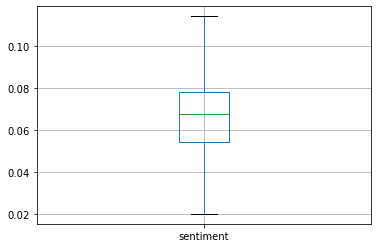

In [49]:
train.boxplot()

<AxesSubplot:xlabel='Date'>

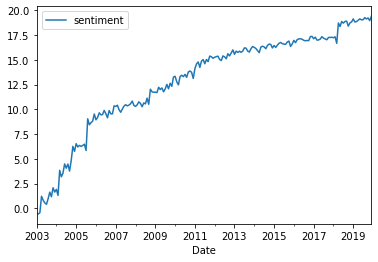

In [51]:
train.pct_change().cumsum().plot()

<AxesSubplot:xlabel='Date'>

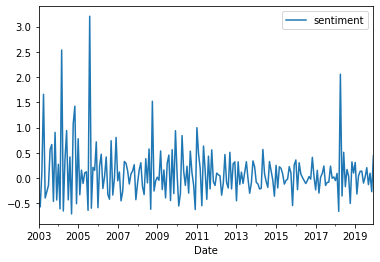

In [53]:
train.pct_change().plot()

In [ ]:
def remove_html_tags(text):
    clean = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});' '')
    return re.sub(clean, '', text)

In [ ]:
finalData = pd.DataFrame()
currentArticle = []
date = pd.DataFrame(columns ={'date'})
title = pd.DataFrame(columns ={'title'})
currentUrl = pd.DataFrame(columns ={'url'})
bodyText = pd.DataFrame(columns ={'text'})
startDate = pd.Timestamp('2000-01-01 00:00:00+00:00', tz='UTC')
currentDate = startDate
endDate = pd.Timestamp('2022-04-01 00:00:00+00:00', tz='UTC')
dateRange = pd.date_range(startDate, endDate)

In [11]:
data = pd.read_json(str(files[2]), orient='columns')


In [ ]:
text = []
for index, row in data.iterrows():
    if words_in_string(words, data.iloc[index,:]['fields']['bodyText'].lower()):
        if len(words_in_string(sections, row['sectionId'].lower())) < 1:
            if len(articles) < 1:
                articles = pd.DataFrame(row)
                articles = articles.T.reset_index(drop=True)
            else:
                articles = articles.append(row, ignore_index=True)

In [ ]:
text

In [ ]:
# https://stackoverflow.com/questions/21718345/python-how-to-determine-if-a-list-of-words-exist-in-a-string
def words_in_string(word_list, a_string):
    return set(word_list).intersection(a_string.split())

In [ ]:
for file in files:
    data = pd.read_json(str(file), orient='columns')
    for index, row in data.iterrows():
        if words_in_string(words, data.iloc[index,:]['fields']['bodyText'].lower()):
            if len(words_in_string(sections, row['sectionId'].lower())) < 1:
                articles = articles.append(data,True)